In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from datetime import datetime
import yfinance as yf

In [153]:
tata = yf.Ticker("TATAMOTORS.NS").history(start="2023-12-10", end="2025-05-20")
tata = tata.reset_index()
tata

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2023-12-11 00:00:00+05:30,715.591749,724.264996,714.345594,718.582520,6403209,0.0,0.0
1,2023-12-12 00:00:00+05:30,722.570203,722.570203,710.806517,713.199158,6461539,0.0,0.0
2,2023-12-13 00:00:00+05:30,713.797286,719.230532,711.304977,718.084045,5807736,0.0,0.0
3,2023-12-14 00:00:00+05:30,721.772692,722.470551,716.389280,717.535767,6732352,0.0,0.0
4,2023-12-15 00:00:00+05:30,721.673000,731.741904,719.031128,730.146851,12082079,0.0,0.0
...,...,...,...,...,...,...,...,...
348,2025-05-13 00:00:00+05:30,720.799988,726.000000,703.250000,707.700012,16125700,0.0,0.0
349,2025-05-14 00:00:00+05:30,690.000000,708.000000,686.000000,698.950012,31505402,0.0,0.0
350,2025-05-15 00:00:00+05:30,698.750000,729.799988,696.150024,728.099976,28634074,0.0,0.0
351,2025-05-16 00:00:00+05:30,730.000000,742.000000,725.549988,730.700012,20631512,0.0,0.0


In [154]:
tata['Date_Only'] = pd.to_datetime(tata['Date']).dt.date
tata['Date_Only']=tata['Date']

In [155]:
tata['Close']=pd.to_datetime(tata['Close'])
tata['TimeIndex']=np.arange(len(tata))

In [156]:
X=tata[['TimeIndex']].values
y=tata['Close'].values

In [157]:
model=LinearRegression()
model.fit(X,y)
y_pred = model.predict(X)

In [161]:
future_y = model.predict(np.array([[len(tata)+ i] for i in range(1,5)]))
future_dates = pd.date_range(start="2025-05-20", end="2025-05-23")
print(future_dates)
future_df = pd.DataFrame({'Date':future_dates, 'Close': future_y})
print(future_df[['Date','Close']].to_string())

DatetimeIndex(['2025-05-20', '2025-05-21', '2025-05-22', '2025-05-23'], dtype='datetime64[ns]', freq='D')
        Date       Close
0 2025-05-20  721.358027
1 2025-05-21  720.564673
2 2025-05-22  719.771318
3 2025-05-23  718.977964


Text(0.5, 1.0, 'tata stock over years')

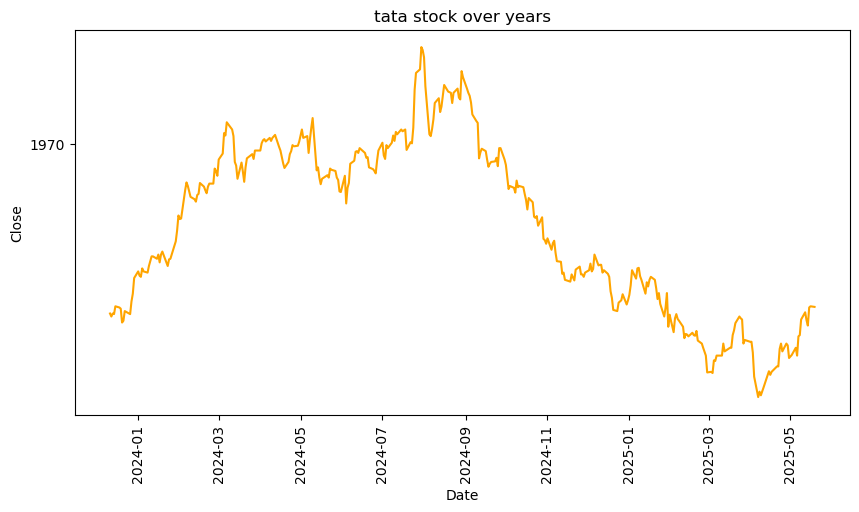

In [182]:
plt.figure(figsize=(10,5))
plt.plot(tata['Date'],y , color='orange')
plt.xticks(rotation='vertical');
plt.xlabel("Date")
plt.ylabel("Close")
plt.title("tata stock over years")

Text(0.5, 1.0, 'Predictive closing price of tata stock')

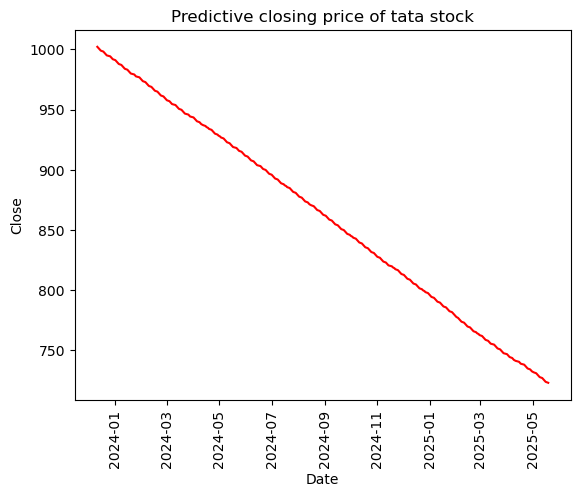

In [180]:
plt.plot(tata['Date'], y_pred, color= 'red', label = 'LinearRegression')
plt.xticks(rotation='vertical');
plt.xlabel("Date")
plt.ylabel("Close")
plt.title("Predictive closing price of tata stock")